# Figure 1
## Figure 1d

Heatmap visualization of the pegRNAs included in the TP53 sensor library, which includes SNVs, indels, and silent substitutions.

In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
#import re
import scipy.stats
import regex as re
plt.rc('font', family='Helvetica')

In [16]:
#first read in information about the library

p53_filtered = pd.read_csv('p53_PE_sensor_FINAL_clean.csv')


#and then calculating amino acid location of each pegRNA
snps = p53_filtered[p53_filtered['classification']=='Observed SNV'].copy()

mut = []
for aa in snps['HGVSp']:
    aaa = re.split('(\d+)', aa)[-1]
    mut.append(aaa)

snps['mut_aa']=mut
uniq_aa = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y','Ter',]

dict_aa = dict(zip(uniq_aa,list(range(21))))
mat = np.zeros((21,393))

for i, val in snps.iterrows():
    m = str(val['mut_aa'])
    m_idx = dict_aa[m]

    codon = int(val['codon'])-1

    mat[m_idx][codon]+=1

#and neutrals, insertions, deletions
neutrals = p53_filtered[p53_filtered['classification']=='Silent']
ins = p53_filtered[p53_filtered['variant_type']=='INS']
dels = p53_filtered[p53_filtered['variant_type']=='DEL']

neut1 = np.zeros((1,393))
ins1 = np.zeros((1,393))
del1 = np.zeros((1,393))

for i, val in neutrals.iterrows():
    cod = int(val['codon'])-1
    neut1[0][cod]+=1
for i, val in ins.iterrows():
    cod = int(val['codon'])-1
    ins1[0][cod]+=1
for i, val in dels.iterrows():
    cod = int(val['codon'])-1
    del1[0][cod]+=1


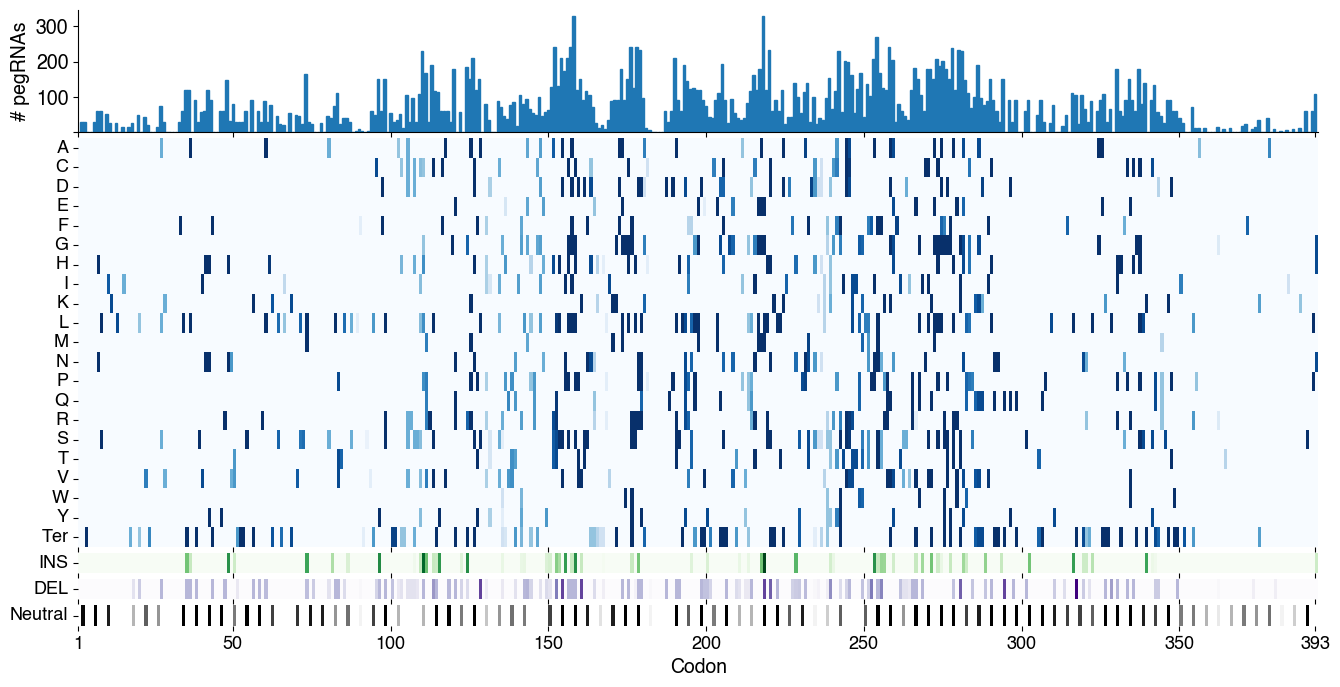

In [17]:
#and plotting the results
fig, ax = plt.subplots(5,1, figsize=(16,8), height_ratios=[3, 10,.5,.5,.5], sharex=True)
g = sns.heatmap(mat, cmap='Blues', cbar=False, ax=ax[1])

g1 = sns.heatmap(ins1, cmap='Greens', cbar=False, ax=ax[2])
g2 = sns.heatmap(del1, cmap='Purples', cbar=False, ax=ax[3])
g3 = sns.heatmap(neut1, cmap='Greys', cbar=False, ax=ax[4])


uniq_aa2 = uniq_aa[:-1] + ['*']
#ax.set_yticks(range(1,22), rotation=0)
#ax[1].set_yticks(range(len(uniq_aa)), rotation=0)
totals = np.sum(mat,axis=0) + neut1[0] + del1[0] + ins1[0]
ax[0].bar(range(393), totals, color='tab:blue', edgecolor='tab:blue')
#ax[0].plot(range(393), totals)


ax[1].set_yticklabels(uniq_aa, rotation=0)
ax[2].set_yticklabels(['INS'], rotation=0)
ax[3].set_yticklabels(['DEL'], rotation=0)
ax[4].set_yticklabels(['Neutral'], rotation=0)
ax[4].set_xticks([0,49,99,149,199,249,299,349,392])
ax[4].set_xticklabels([1,50,100,150,200,250,300,350, 393], rotation=0)

ax[0].tick_params(axis='both', which='major', labelsize=13)

ax[1].tick_params(axis='both', which='major', labelsize=13)
ax[2].tick_params(axis='both', which='major', labelsize=13)
ax[3].tick_params(axis='both', which='major', labelsize=13)
ax[4].tick_params(axis='both', which='major', labelsize=13)

ax[4].set_xlabel('Codon', fontsize=14)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)


ax[0].set_ylabel('# pegRNAs', fontsize=14)
ax[0].set_yticks([0,100,200,300], fontsize=14)
ax[0].set_yticklabels(['',100,200,300], fontsize=14)

#fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
fig.subplots_adjust(hspace=0.05)


#fig.tight_layout()

## Figure 1e
Correlation between editing at the sensor and endogenous locus in 8 TP53-targeting pegRNA-sensor pairs at Day 3 (D3) and Day 7 (D7) post-transduction.

Full source code for quantification of fastq files provided in repository. This is just working with the processed data (correct editing percentages).

In [26]:
sensor_endog = pd.read_csv('sensor_v_endogenous_editing/sensor_endogenous.csv').dropna().set_index('Mutation')
sensor_endog

,Endogenous-D3,Endogenous-D7,Sensor-D3,Sensor-D7
Mutation,,,,
D259Y,1.145972,1.607384,1.320375,3.677997
M246R,0.233045,0.213825,1.235587,1.604326
E258E,0.741811,0.896428,0.076257,0.146775
R175H,0.094687,0.267368,0.979819,2.394840
M169I,6.861187,10.675487,9.517663,25.050927
H178R,3.218925,3.752008,6.875750,24.760648
E285Q,28.312254,50.060714,33.278466,75.158212
R110G,0.921319,1.071250,1.877490,3.495265


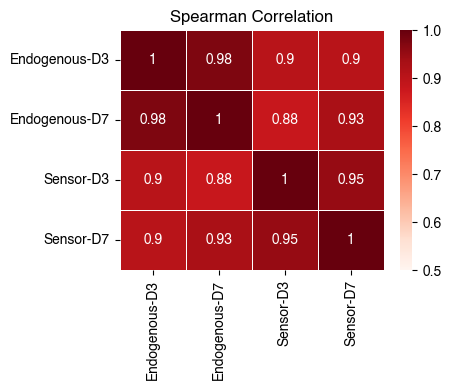

In [32]:
plt.figure(figsize=(4.7,4))
sns.heatmap(sensor_endog.corr(method='spearman'), cmap='Reds', vmin=.5, annot=True, linewidth=.5)
plt.title('Spearman Correlation')
plt.tight_layout()

## Figure 1g

The average correct editing percentage among all pegRNAs in the library (left) or when considering only the most efficient pegRNA for each variant (right) at various time-points in both conditions. 

In [10]:
#first read in information about the library

p53_filtered = pd.read_csv('p53_PE_sensor_FINAL_clean.csv')

#and also information about the editing efficiency of each pegRNA in each time-point and replicate

samples = ['Plasmid-Library', 'D4-REP1', 'D4-REP2', 'D4-REP3',
'D16-REP1', 'D16-REP2', 'D16-REP3',
'D16-NUT-REP1', 'D16-NUT-REP2', 'D16-NUT-REP3',
'D25-REP1', 'D25-REP2', 'D25-REP3',
'D25-NUT-REP1', 'D25-NUT-REP2','D25-NUT-REP3',
'D34-REP1', 'D34-REP2', 'D34-REP3',
'D34-NUT-REP1', 'D34-NUT-REP2', 'D34-NUT-REP3']

crispresso = os.listdir("crispresso/compact_filtered_background_subtracted")

reorder = []
for i in samples:
    for k in crispresso:
        if i in k:
            df = pd.read_csv(f"crispresso/compact_filtered_background_subtracted/{k}")
            reorder.append(df)


cp_dict = dict(zip(samples, reorder))

In [18]:
uniq_vars = list(np.unique(p53_filtered['HGVSp']))

avgs = []
maxs = []

#consider only pegRNAs with over 100 sensor reads
count_threshold=100

#calculating oveall average
for x in samples[1:]:
    df = cp_dict[x]
    fil = df[df['Reads_aligned_all_amplicons']>=count_threshold]
    avg = np.average(fil['corr_perc_backsub'])
    avgs.append(avg)

    #calculating max efficiency pegRNA per variant
    max1 = []
    for var in uniq_vars:
        pids = list(p53_filtered[p53_filtered['HGVSp']==var]['peg_id'])

        subset = fil[fil['peg_id'].isin(pids)]['corr_perc_backsub']
        if len(subset)>0: #only counting variants with enough 
            max1.append(max(subset))

    maxs.append(np.average(max1))



conditions = [i[:-5] for i in samples[1:]]
nutlin = []
for i in conditions:
    if 'NUT' in i:
        nutlin.append('Nutlin')
    else:
        nutlin.append('WT')

df_perc = pd.DataFrame(dict(zip(['Sample', 'Condition', 'Nutlin', 'Correct % Average', 'Correct % MAX'], [samples[1:], conditions, nutlin, avgs, maxs])))

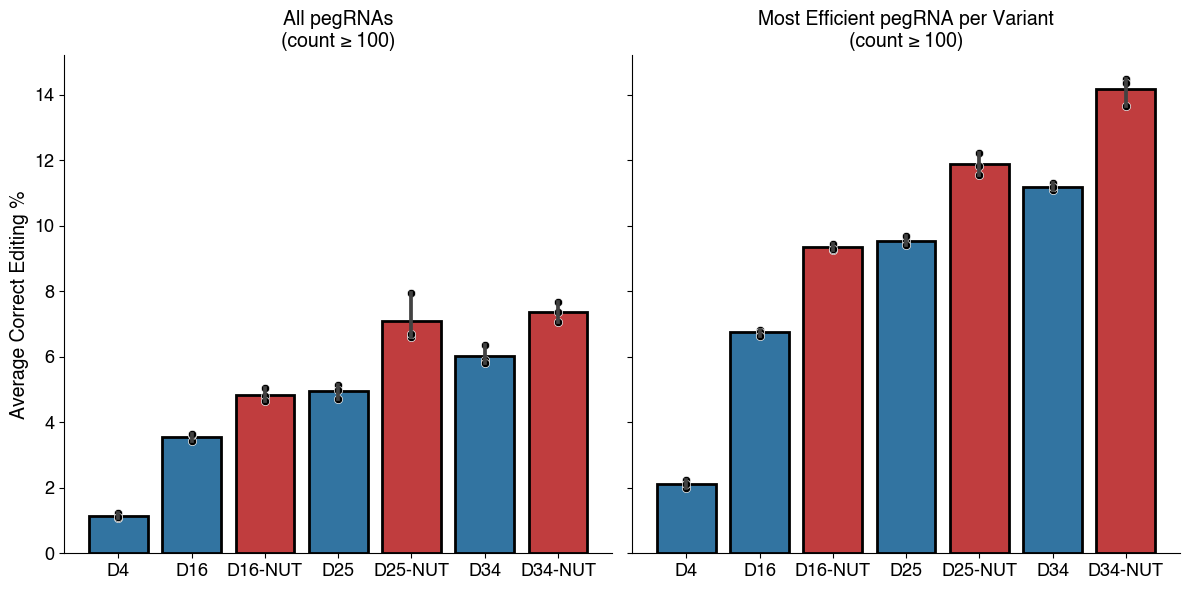

In [19]:
#and plotting

fig, ax = plt.subplots(1,2, figsize=(12,6), sharey=True)

colors = ['tab:blue', 'tab:blue', 'tab:red', 'tab:blue', 'tab:red', 'tab:blue', 'tab:red']

g = sns.barplot(data = df_perc, x='Condition', y='Correct % Average', ax=ax[0], linewidth=2, edgecolor='black', palette=colors)
g2 = sns.barplot(data = df_perc, x='Condition', y='Correct % MAX', ax=ax[1], linewidth=2, edgecolor='black', palette=colors)

g = sns.scatterplot(data = df_perc, x='Condition', y='Correct % Average', ax=ax[0], color='black')
g2 = sns.scatterplot(data = df_perc, x='Condition', y='Correct % MAX', ax=ax[1], color='black')


# We change the fontsize of minor ticks label 
ax[0].tick_params(axis='both', which='major', labelsize=13)
ax[1].tick_params(axis='both', which='major', labelsize=13)

ax[0].set_ylabel("Average Correct Editing %", fontsize=14)
ax[1].set_ylabel("")
ax[0].set_xlabel("")
ax[1].set_xlabel("")

ax[0].set_title(f"All pegRNAs\n(count ≥ {count_threshold})", fontsize=14)
ax[1].set_title(f"Most Efficient pegRNA per Variant\n(count ≥ {count_threshold})", fontsize=14)


ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.tight_layout()

## Figure 1h

Rank plot of the correct editing percentage of the most efficient pegRNA per variant, as assayed at the sensor locus, at each time-point. 


In [20]:
# reading in MERGED correct editing percentages
# this is just adding the outcomes of different replicates to improve sample size

#reading in correct editing percentages
#loading in the merged replicates to boost confidence on sensor
fp = "crispresso_replicates_merged"

reorder = []

conditions = ['D4', 'D16', 'D16-NUT', 'D25', 'D25-NUT', 'D34', 'D34-NUT']

for i in conditions:
    df = pd.read_csv(f"{fp}/{i}_reps_combined.csv")
    df['peg_id'] = p53_filtered['peg_id']
    reorder.append(df)

cp_dict2 = dict(zip(conditions, reorder))

In [21]:
#variant CDF plots

counts_threshold=10

peeps = [ ]

x_samp = ['D4', 'D16', 'D16-NUT', 'D25', 'D25-NUT', 'D34', 'D34-NUT']
for sample in x_samp:

    #this is irrelevant; just 
    bb = p53_filtered.copy()

    d34 = cp_dict2[sample]

    
    d34 = d34[d34['Reads_aligned_all_amplicons']>=counts_threshold]

    merged = pd.merge(bb, d34, on='peg_id')
    uniq_idx = list(np.unique(merged['variant_index']))

    i_maxs = []
    for idx in uniq_idx:
        sub = merged[merged['variant_index']==idx]
        i_max = sub['corr_perc_backsub'].idxmax()
        i_maxs.append(i_max)


    merged = merged.iloc[i_maxs]

    pp = np.array(merged.sort_values(by='corr_perc_backsub', ascending=False)['corr_perc_backsub'])
    peeps.append(pp)

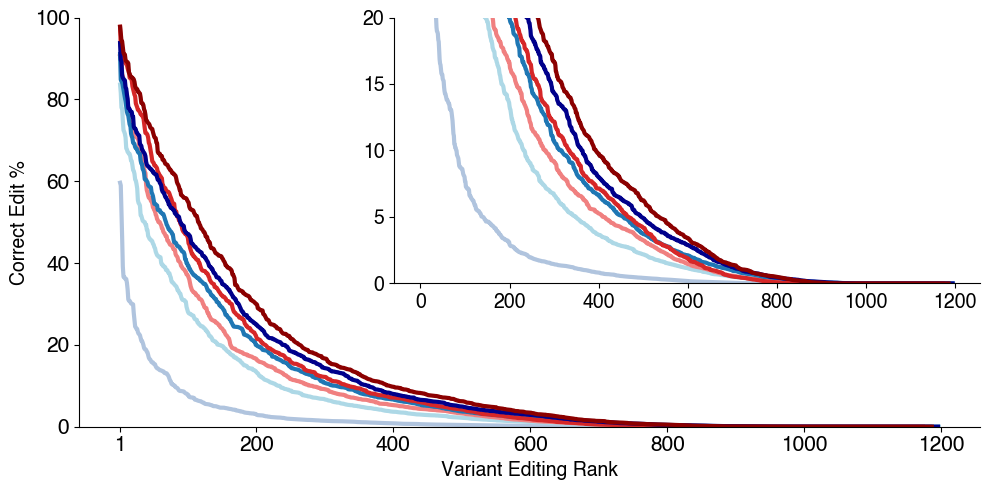

In [22]:
fig, ax = plt.subplots(figsize=(10,5))

colors = ['lightsteelblue','lightblue', 'lightcoral', 'tab:blue', 'tab:red', 'darkblue','darkred']

ins = ax.inset_axes([0.35,.35,0.65,0.65])


for i, val in enumerate(peeps):
    ax.plot(list(range(1,len(val)+1)),val, linewidth=3, label=x_samp[i], color=colors[i])
    ins.plot(list(range(1,len(val)+1)),val, linewidth=3, label=x_samp[i], color=colors[i])

ax.tick_params(axis='both', which='major', labelsize=15)
ins.tick_params(axis='both', which='major', labelsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ins.spines['top'].set_visible(False)
ins.spines['right'].set_visible(False)

ax.set_xticks([1,200,400,600,800,1000,1200])

ax.set_ylim(0,100)
ins.set_ylim(0,20)
#ax.legend()

ax.set_ylabel('Correct Edit %', fontsize=14)
ax.set_xlabel('Variant Editing Rank', fontsize=14)



fig.tight_layout()